# Cendikia Ishmatuka S (19/439607/TK/48337)

In [1]:
import pybullet as p
import pybullet_data
import numpy as np
import time
import matplotlib.pyplot as plt
from TurtleBot_FixedTarget import TurtleBot
from TurtleBot_followtrajectory import TurtleBot2

pybullet build time: Oct  9 2022 15:48:30


# FIrst Case: Fixed Target

In [2]:
simulation = True

pose_target= np.array([-2,0,0])
turtlebot = TurtleBot(simulation)
actions, orientations, poses = turtlebot.main(pose_target= pose_target, Kp = 20)

startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa/X.org
GL_RENDERER=llvmpipe (LLVM 13.0.1, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 22.0.5
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 22.0.5
Vendor = Mesa/X.org
Renderer = llvmpipe (LLVM 13.0.1, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa/X.org
ven = Mesa/X.org
Position now: [-1.96011998  1.99559056  0.035627  ], Orientation: [ 2.81796974e-04 -1.11119679e-02  3.03135806e+00], with orientation error = 0.00011435614593270758, an

In [3]:
t1 = np.arange(0, len(actions)*turtlebot.dt, turtlebot.dt)

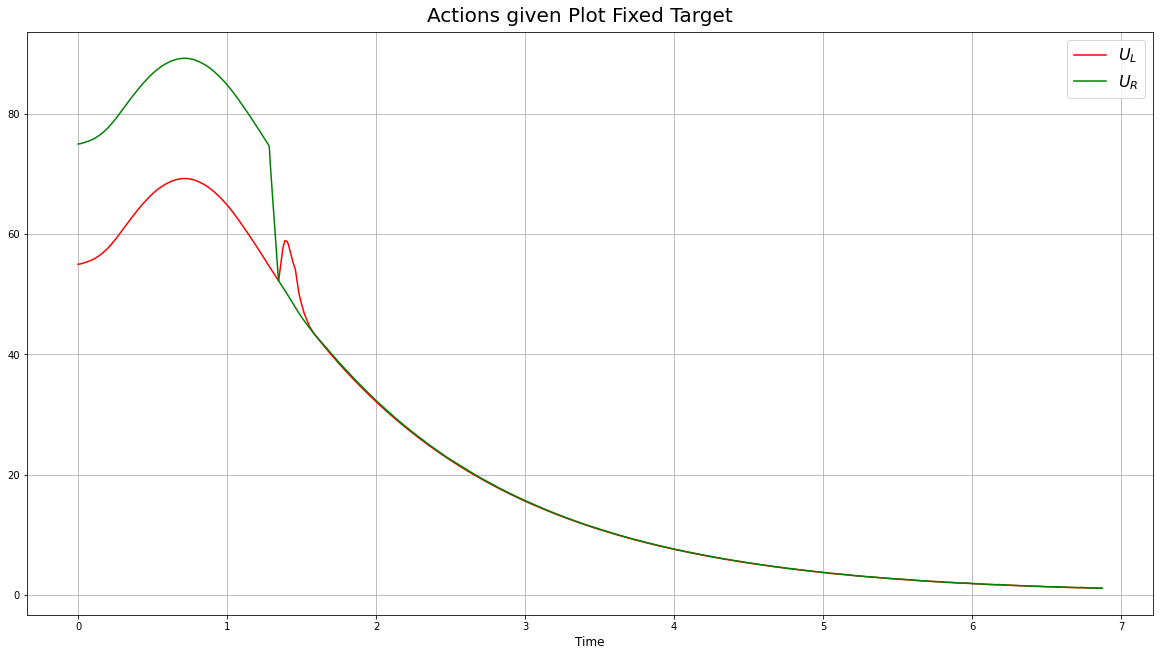

In [4]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(t1, actions[:,0], c='r', label='$U_L$')
ax.plot(t1, actions[:,1], c='g', label='$U_R$')
ax.set_xlabel("Time", fontsize=12)
ax.legend(loc='upper right', fontsize = 16)
fig.suptitle("Actions given Plot Fixed Target", fontsize = 20)
plt.grid()
plt.show()

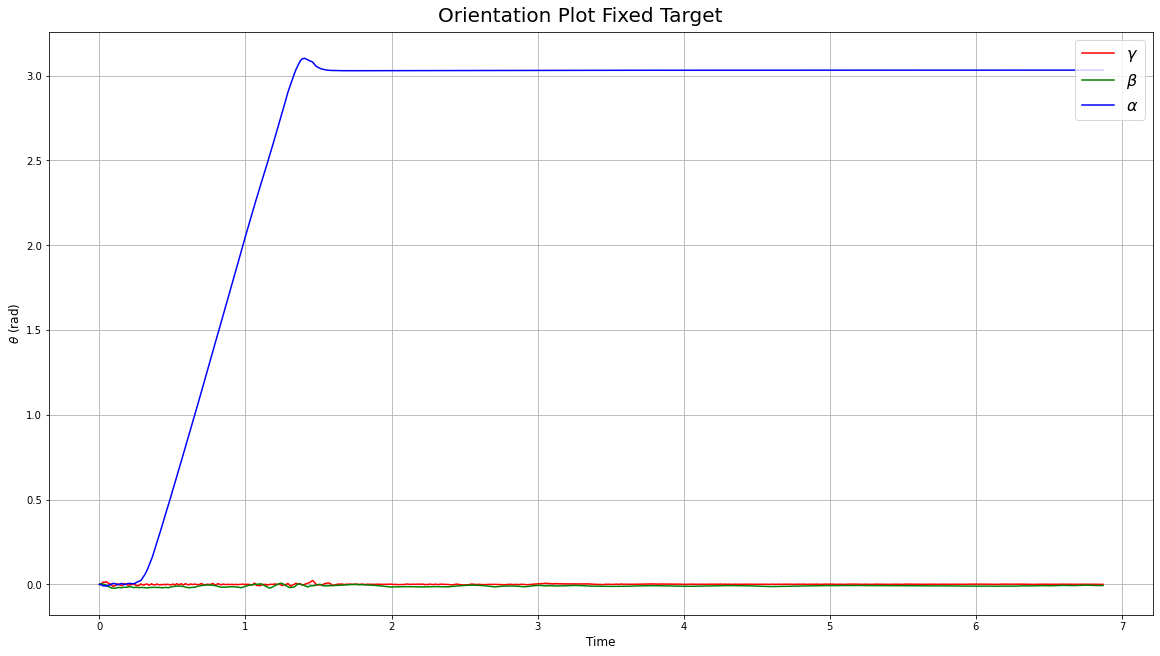

In [5]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(t1, orientations[:,0], c='r', label='$\\gamma$')
ax.plot(t1, orientations[:,1], c='g', label='$\\beta$')
ax.plot(t1, orientations[:,2], c='b', label='$\\alpha$')
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("$\\theta$ (rad)", fontsize=12)
ax.legend(loc='upper right', fontsize = 16)
fig.suptitle("Orientation Plot Fixed Target", fontsize = 20)
plt.grid()
plt.show()

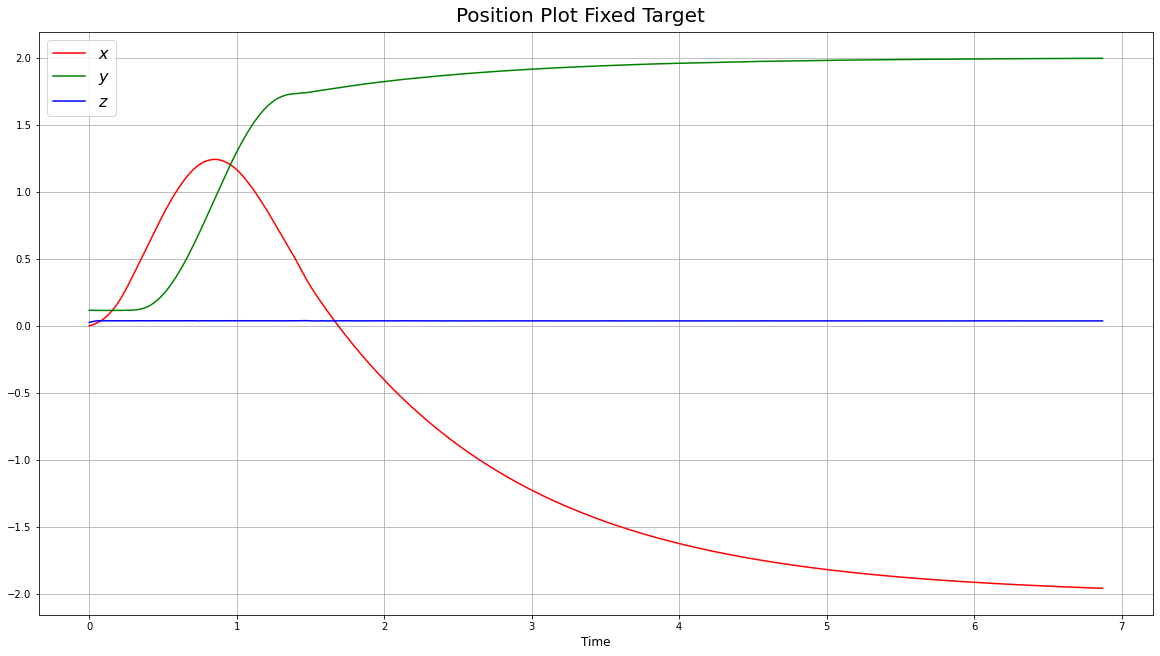

In [6]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(t1, poses[:,0], c='r', label='$x$')
ax.plot(t1, poses[:,1], c='g', label='$y$')
ax.plot(t1, poses[:,2], c='b', label='$z$')
ax.set_xlabel("Time", fontsize=12)
ax.legend(loc='upper left', fontsize = 16)
fig.suptitle("Position Plot Fixed Target", fontsize = 20)
plt.grid()
plt.show()

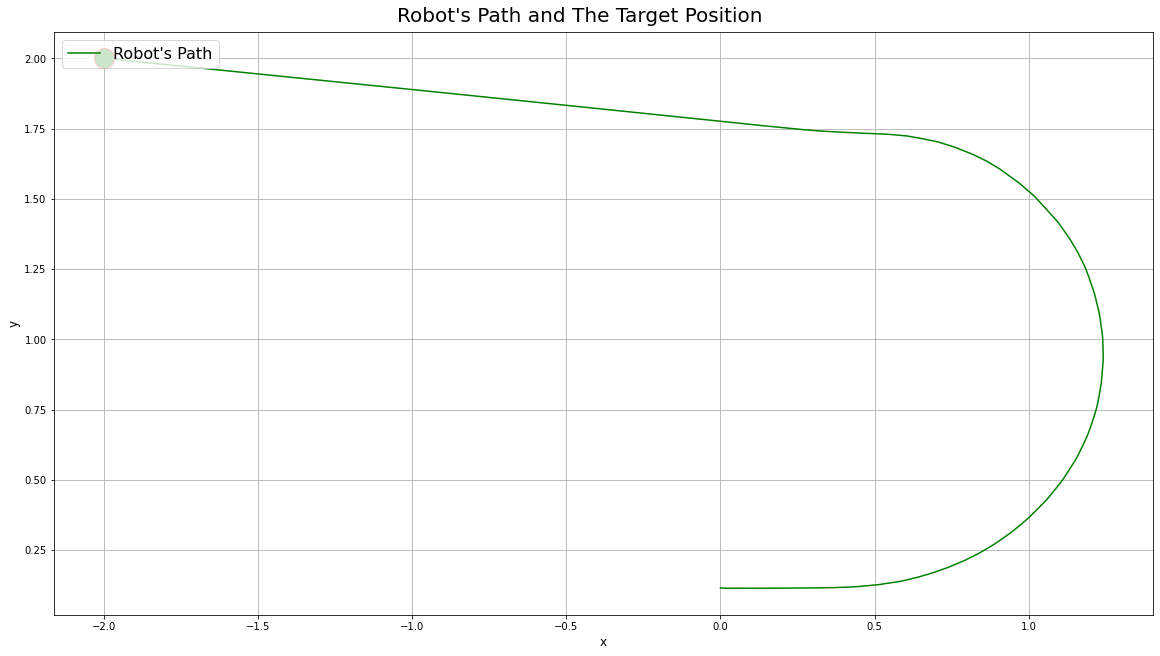

In [7]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(poses[:,0], poses[:,1], c='g', label="Robot's Path")
ax.plot(pose_target[0],pose_target[1],marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.legend(loc='upper left', fontsize = 16)
fig.suptitle("Robot's Path and The Target Position", fontsize = 20)
plt.grid()
plt.show()

# Second Case: Follow Trajectory

In [8]:
x = np.arange(0.1, 2*np.pi, 1./(2*240.))
y = np.sin(x)
z = np.zeros(len(x))
pose_targets = np.array([x,y,z]).T.reshape(len(x),1,3)

turtlebot2 = TurtleBot2(simulation)
acts, orients, pose = turtlebot2.main(pose_targets=pose_targets, Kp=50)

Position now: [ 6.0067584  -0.25906786  0.03616189], Orientation: [ 2.05217788e-04 -1.38418867e-02  7.50751141e-01], with orientation error = 0.0020057814114426845, and pose_error: [ 0.2744916   0.25713256 -0.03616189]


In [9]:
t2 = np.arange(0,len(x)*1./(2*240.), 1./(2*240.))

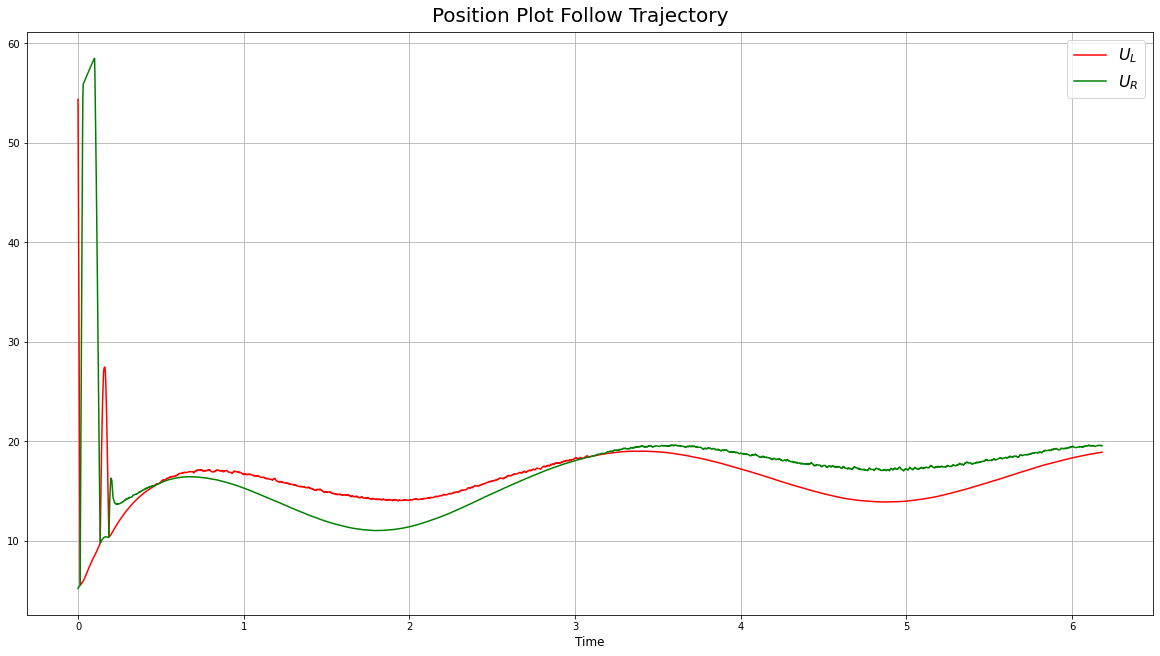

In [10]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(t2, acts[:,0], c='r', label='$U_L$')
ax.plot(t2, acts[:,1], c='g', label='$U_R$')
ax.set_xlabel("Time", fontsize=12)
ax.legend(loc='upper right', fontsize = 16)
fig.suptitle("Position Plot Follow Trajectory", fontsize = 20)
plt.grid()
plt.show()

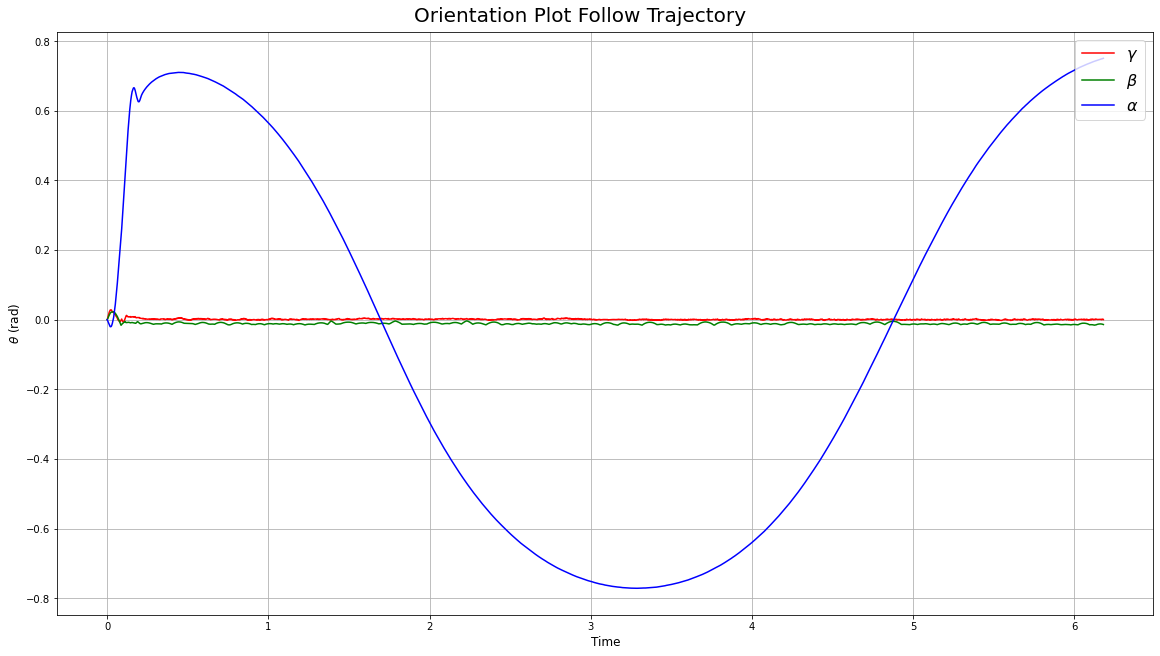

In [11]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(t2, orients[:,0], c='r', label='$\\gamma$')
ax.plot(t2, orients[:,1], c='g', label='$\\beta$')
ax.plot(t2, orients[:,2], c='b', label='$\\alpha$')
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("$\\theta$ (rad)", fontsize=12)
ax.legend(loc='upper right', fontsize = 16)
fig.suptitle("Orientation Plot Follow Trajectory", fontsize = 20)
plt.grid()
plt.show()

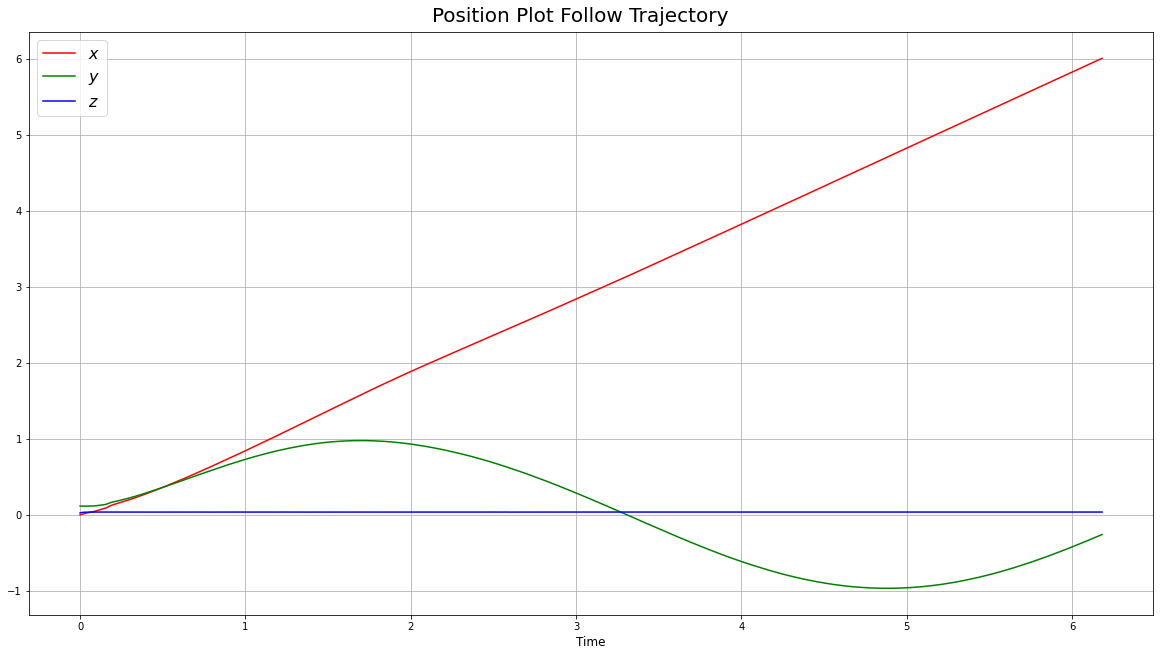

In [12]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(t2, pose[:,0], c='r', label='$x$')
ax.plot(t2, pose[:,1], c='g', label='$y$')
ax.plot(t2, pose[:,2], c='b', label='$z$')
ax.set_xlabel("Time", fontsize=12)
ax.legend(loc='upper left', fontsize = 16)
fig.suptitle("Position Plot Follow Trajectory", fontsize = 20)
plt.grid()
plt.show()

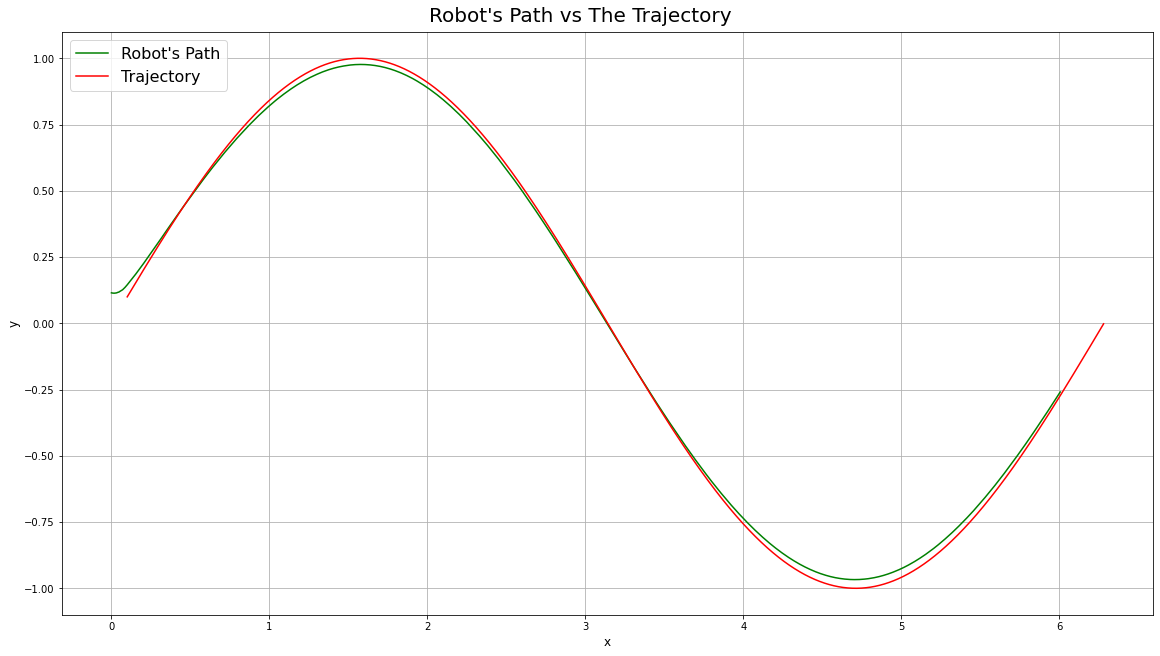

In [13]:
fig, ax = plt.subplots(figsize=(16,9), constrained_layout=True)

ax.plot(pose[:,0], pose[:,1], c='g', label="Robot's Path")
ax.plot(x,y, c="r", label="Trajectory")
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.legend(loc='upper left', fontsize = 16)
fig.suptitle("Robot's Path vs The Trajectory", fontsize = 20)
plt.grid()
plt.show()